In [1]:
import pandas as pd
df = pd.read_pickle("block4_1_concat.pkl")
df1 = pd.read_pickle("block4_4_concat.pkl")

In [2]:
df = df[["lat","lon","speed","lon_acc","lat_acc","type","avg_speed","bearing","edge_progress","dir","edge_progress_intervals","vehicle_density","avg_surr_speed","xtrack_dist","nearest_edge_start_node","nearest_edge_end_node"]]
df1 = df1[["lat","lon","speed","lon_acc","lat_acc","type","avg_speed","bearing","edge_progress","dir","edge_progress_intervals","vehicle_density","avg_surr_speed","xtrack_dist","nearest_edge_start_node","nearest_edge_end_node"]]
df_new = pd.concat([df,df1],axis = 0)
df1 = 0
df = 0
df_new["edge_id"] = df_new["nearest_edge_start_node"].astype(str)+"_"+df_new["nearest_edge_end_node"].astype(str)
df_new.to_pickle("block4_1_4_concat.pkl")

In [58]:
import osmnx as ox
import pandas as pd
df = pd.read_pickle("block4_1_4_concat.pkl")
lat = df.iloc[1,0]
lon = df.iloc[1,1]
graph = ox.graph_from_point((lat,lon), network_type='drive', dist=700)

In [2]:

df_nodes = df[['nearest_edge_start_node','nearest_edge_end_node']].reset_index()[['nearest_edge_start_node','nearest_edge_end_node']].drop_duplicates()
selected_edges = [(u,v) for u,v,e in graph.edges(data=True) if (u in df_nodes.nearest_edge_start_node.values and v in df_nodes.nearest_edge_end_node.values)
                  or (v in df_nodes.nearest_edge_start_node.values and u in df_nodes.nearest_edge_end_node.values)]
u,v  = zip(*selected_edges)


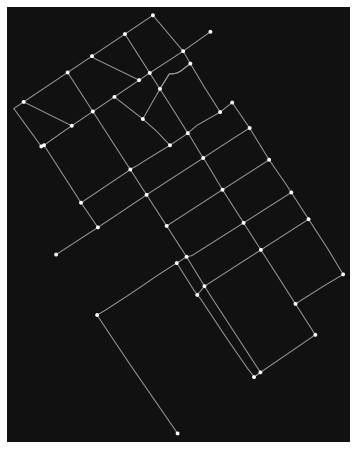

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [3]:
H = graph.subgraph(u + v)
ox.plot.plot_graph(H)

In [4]:
edge_list = df[df.type.isin(["Car","Taxi"])][['edge_id']].reset_index()[['edge_id','id']].drop_duplicates().groupby(['edge_id']).count().reset_index()
edge_list

,edge_id,id
0,250691795_250692406,5
1,250691795_250699359,2402
2,250692406_300400248,752
3,250698924_250698926,112
4,250698926_250699612,1092
5,250699359_250699613,1746
6,250699359_250709162,1346
7,250699359_8446047162,1341
8,250699362_250699984,2182
9,250699362_250700083,1609


In [6]:
df = df[df.edge_id.isin(edge_list[edge_list.id >= 200]['edge_id'])]
def length(start_node,end_node):
    
    try:
        val = graph[start_node][end_node][0]["length"]
    except KeyError:
        val = graph[end_node][start_node][0]["length"]
    return val

df_nodes = df.reset_index()[['nearest_edge_start_node','nearest_edge_end_node','edge_id']].drop_duplicates()
df_nodes['len'] = df_nodes.apply(lambda x: length(x[0],x[1]),axis = 1)
edges_to_select = df_nodes[df_nodes.len >=65].edge_id.unique()
df = df[df.edge_id.isin(edges_to_select)]
df.head()

lat        lon    speed  lon_acc  lat_acc type  avg_speed  \
id    time                                                                    
1_1_1 4.48  37.981525  23.734275  16.6279  -1.4742   0.1357  Bus   5.227568   
      4.52  37.981526  23.734277  16.4127  -1.5150   0.1449  Bus   5.227568   
      4.56  37.981527  23.734278  16.1913  -1.5597   0.1543  Bus   5.227568   
      4.60  37.981527  23.734280  15.9632  -1.6082   0.1638  Bus   5.227568   
      4.64  37.981528  23.734282  15.7285  -1.6516   0.1736  Bus   5.227568   

             bearing  edge_progress  dir  edge_progress_intervals  \
id    time                                                          
1_1_1 4.48  0.330390       1.007785    0                      1.0   
      4.52  0.169830       1.007733    1                      1.0   
      4.56  1.570795       1.007974    0                      1.0   
      4.60  0.330399       1.007390    0                      1.0   
      4.64  0.169834       1.007341    1                      1.0   

            vehicle_density  avg_surr_speed  xtrack_dist  \
id    time                                                 
1_1_1 4.48                1         16.6279    -5.153277   
      4.52                1         16.4127    -4.945704   
      4.56                1         16.1913    -4.811658   
      4.60                1         15.9632    -4.664605   
      4.64                1         15.7285    -4.457032   

            nearest_edge_start_node  nearest_edge_end_node  \
id    time                                                   
1_1_1 4.48                250691795              250699359   
      4.52                250691795              250699359   
      4.56                250691795              250699359   
      4.60                250691795              250699359   
      4.64                250691795              250699359   

                        edge_id  
id    time                       
1_1_1 4.48  250691795_250699359  
      4.52  250691795_250699359  
      4.56  250691795_250699359  
      4.60  250691795_250699359  
      4.64  250691795_250699359

In [7]:
df.head()

lat        lon    speed  lon_acc  lat_acc type  avg_speed  \
id    time                                                                    
1_1_1 4.48  37.981525  23.734275  16.6279  -1.4742   0.1357  Bus   5.227568   
      4.52  37.981526  23.734277  16.4127  -1.5150   0.1449  Bus   5.227568   
      4.56  37.981527  23.734278  16.1913  -1.5597   0.1543  Bus   5.227568   
      4.60  37.981527  23.734280  15.9632  -1.6082   0.1638  Bus   5.227568   
      4.64  37.981528  23.734282  15.7285  -1.6516   0.1736  Bus   5.227568   

             bearing  edge_progress  dir  edge_progress_intervals  \
id    time                                                          
1_1_1 4.48  0.330390       1.007785    0                      1.0   
      4.52  0.169830       1.007733    1                      1.0   
      4.56  1.570795       1.007974    0                      1.0   
      4.60  0.330399       1.007390    0                      1.0   
      4.64  0.169834       1.007341    1                      1.0   

            vehicle_density  avg_surr_speed  xtrack_dist  \
id    time                                                 
1_1_1 4.48                1         16.6279    -5.153277   
      4.52                1         16.4127    -4.945704   
      4.56                1         16.1913    -4.811658   
      4.60                1         15.9632    -4.664605   
      4.64                1         15.7285    -4.457032   

            nearest_edge_start_node  nearest_edge_end_node  \
id    time                                                   
1_1_1 4.48                250691795              250699359   
      4.52                250691795              250699359   
      4.56                250691795              250699359   
      4.60                250691795              250699359   
      4.64                250691795              250699359   

                        edge_id  
id    time                       
1_1_1 4.48  250691795_250699359  
      4.52  250691795_250699359  
      4.56  250691795_250699359  
      4.60  250691795_250699359  
      4.64  250691795_250699359

In [8]:
edge_list = df.reset_index()[['edge_id','nearest_edge_start_node','nearest_edge_end_node','id']].drop_duplicates().groupby(['edge_id','nearest_edge_start_node','nearest_edge_end_node']).count().reset_index()
edge_list

,edge_id,nearest_edge_start_node,nearest_edge_end_node,id
0,250691795_250699359,250691795,250699359,3688
1,250698926_250699612,250698926,250699612,1768
2,250699359_8446047162,250699359,8446047162,1985
3,250699362_250699984,250699362,250699984,3402
4,250699362_250708641,250699362,250708641,3114
5,250699613_250699614,250699613,250699614,3340
6,250699614_250699615,250699614,250699615,1446
7,250699614_250699711,250699614,250699711,1801
8,250699711_250699973,250699711,250699973,680
9,250699711_599116897,250699711,599116897,1556


In [9]:
def oneway(start_node,end_node):
    
    try:
        print(graph[start_node][end_node][0]["oneway"])
    except KeyError:
        print(graph[end_node][start_node][0]["oneway"])
        
edge_list.apply(lambda x: oneway(x[1],x[2]),axis = 1)


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False


0     None
1     None
2     None
3     None
4     None
5     None
6     None
7     None
8     None
9     None
10    None
11    None
12    None
13    None
14    None
15    None
16    None
17    None
18    None
19    None
20    None
21    None
dtype: object

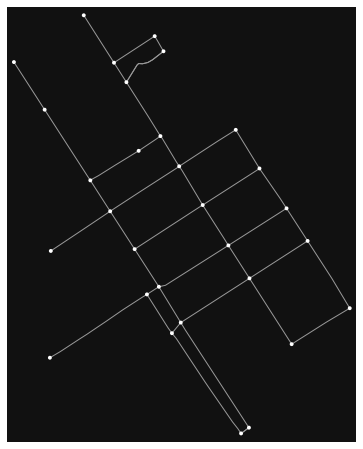

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [10]:
H1 = graph.subgraph(edge_list['nearest_edge_start_node'].to_list() + edge_list["nearest_edge_end_node"].to_list())
ox.plot.plot_graph(H1)

In [11]:
H1.edges

OutMultiEdgeView([(250709255, 250691795, 0), (250706958, 388172056, 0), (250706958, 388172075, 0), (388172056, 250700083, 0), (250708641, 250708556, 0), (250708641, 250706958, 0), (250709162, 250699359, 0), (250709162, 250709255, 0), (388172075, 4464395371, 0), (388172075, 250700339, 0), (250700083, 250699362, 0), (250700084, 250700083, 0), (250700339, 250706959, 0), (250700339, 364104830, 0), (250700085, 250700084, 0), (8446047162, 250699972, 0), (8446047162, 250699614, 0), (250699711, 250708641, 0), (250699711, 250699973, 0), (250699972, 300400247, 0), (250699973, 250699615, 0), (250708556, 250699973, 0), (250699984, 250699362, 0), (250691795, 250709255, 0), (250699612, 250698926, 0), (250699612, 250709162, 0), (250699613, 250699612, 0), (250699613, 250699359, 0), (250699614, 250699613, 0), (250699614, 250699711, 0), (250699359, 8446047162, 0), (250699359, 250691795, 0), (250699615, 250699972, 0), (250699615, 250699614, 0), (599116897, 250699613, 0), (599116897, 250699711, 0), (25069

In [12]:
edges_to_keep = [(u[1],u[2],0) for _,u in edge_list.iterrows()]+[(u[2],u[1],0) for _,u in edge_list.iterrows()]
edges_to_remove = list(set(list(H1.edges)) - set(edges_to_keep))
edges_to_remove

[(250708641, 250706958, 0),
 (250699973, 250699615, 0),
 (250700083, 250699362, 0),
 (250706958, 388172056, 0),
 (250708556, 250699973, 0),
 (388172075, 250700339, 0),
 (250699972, 300400247, 0),
 (250699711, 250708641, 0),
 (4464395371, 364104830, 0),
 (8446047162, 250699614, 0),
 (250699615, 250699972, 0),
 (599116897, 250699613, 0),
 (250709162, 250699359, 0),
 (250699613, 250699612, 0),
 (250699613, 250699359, 0),
 (250709255, 250691795, 0),
 (250691795, 250709255, 0),
 (250699362, 599116897, 0),
 (250699612, 250709162, 0)]

In [13]:
import osmnx as ox
#H2 = H1.remove_edge(edges_to_remove)
ox.io.save_graphml(H1,'graph.gpkg')
H2 = ox.io.load_graphml('graph.gpkg')

In [14]:
for u,v,_ in edges_to_remove:
    H2.remove_edge(u,v)


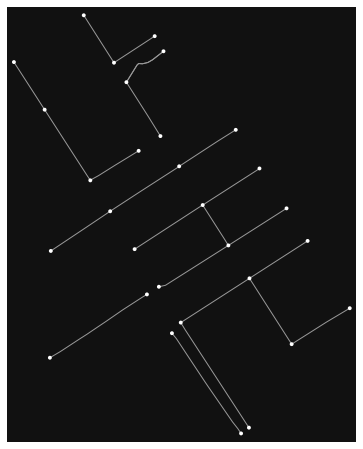

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [15]:
ox.plot.plot_graph(H2)

In [16]:
H2.remove_edge(4464395371,388172075)
H2.remove_edge(388172075,4464395371)

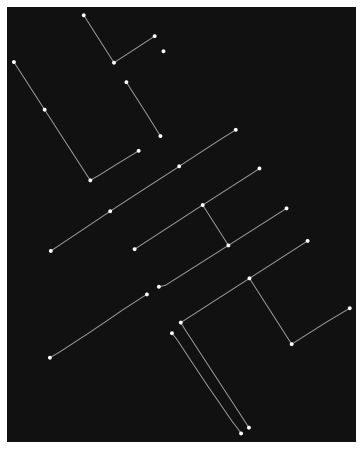

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [17]:
ox.plot.plot_graph(H2)

In [18]:

def oneway(start_node,end_node):
    
    try:
        print(graph[start_node][end_node][0]["oneway"])
    except KeyError:
        print(graph[end_node][start_node][0]["oneway"])

for u,v,_ in list(H2.edges):
    oneway(u,v)


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [19]:
edges_to_keep = list(H2.edges)
u,v,_ = zip(*edges_to_keep)
edges_to_keep = [ str(u[i]) + "_" +str(v[i]) for i in range(len(u))] + [ str(v[i]) + "_" +str(u[i]) for i in range(len(u))]
edges_to_keep

['250706958_388172075',
 '388172056_250700083',
 '250708641_250708556',
 '250709162_250709255',
 '250700084_250700083',
 '250700339_250706959',
 '250700339_364104830',
 '250700085_250700084',
 '8446047162_250699972',
 '250699711_250699973',
 '250699984_250699362',
 '250699612_250698926',
 '250699614_250699613',
 '250699614_250699711',
 '250699359_8446047162',
 '250699359_250691795',
 '250699615_250699614',
 '599116897_250699711',
 '250699362_250708641',
 '300400247_300400248',
 '300400248_8446047162',
 '388172075_250706958',
 '250700083_388172056',
 '250708556_250708641',
 '250709255_250709162',
 '250700083_250700084',
 '250706959_250700339',
 '364104830_250700339',
 '250700084_250700085',
 '250699972_8446047162',
 '250699973_250699711',
 '250699362_250699984',
 '250698926_250699612',
 '250699613_250699614',
 '250699711_250699614',
 '8446047162_250699359',
 '250691795_250699359',
 '250699614_250699615',
 '250699711_599116897',
 '250708641_250699362',
 '300400248_300400247',
 '844604716

In [22]:
df = df[df.edge_id.isin(edges_to_keep)]
df_id_edge_list = df.reset_index()[['id','edge_id']].drop_duplicates()


,id,edge_id
0,1_1_1,250691795_250699359
145,1_1_1,250699359_8446047162
2579,2_1_1,250699362_250708641
2721,3_1_1,250698926_250699612
3712,4_1_1,250699613_250699614
...,...,...
14923398,1714_4_3,250706958_388172075
14923436,1715_4_3,250699362_250699984
14923522,1716_4_3,250699362_250699984
14923573,1718_4_3,250706958_388172075


In [21]:
df_id_edge_list['id']+"_"+df_id_edge_list['edge_id']

0              1_1_1_250691795_250699359
145           1_1_1_250699359_8446047162
2579           2_1_1_250699362_250708641
2721           3_1_1_250698926_250699612
3712           4_1_1_250699613_250699614
                        ...             
14923398    1714_4_3_250706958_388172075
14923436    1715_4_3_250699362_250699984
14923522    1716_4_3_250699362_250699984
14923573    1718_4_3_250706958_388172075
14923585    1719_4_3_250699362_250699984
Length: 38865, dtype: object

In [39]:
df_id_edge_list[df_id_edge_list.edge_id == '250691795_250699359']

,id,edge_id
0,1_1_1,250691795_250699359
10967,4_1_1,250691795_250699359
11525,5_1_1,250691795_250699359
12124,6_1_1,250691795_250699359
37675,8_1_1,250691795_250699359
...,...,...
14891605,1630_4_3,250691795_250699359
14895468,1636_4_3,250691795_250699359
14900567,1647_4_3,250691795_250699359
14905114,1654_4_3,250691795_250699359


In [80]:
df["veh_id"] = df.index.get_level_values(0)
df1 = df[df.edge_id == '250691795_250699359'].head(1)
for edge_id in df_id_edge_list.edge_id.drop_duplicates().values :
    #print(df[df.edge_id.isin([value for sublist in df_id_edge_list[df_id_edge_list.edge_id == edge_id][["id"]].sample(10).values for value in sublist])])
    df1 = pd.concat([df1,df[df.veh_id.isin([value for sublist in df_id_edge_list[df_id_edge_list.edge_id == edge_id][["id"]].sample(10).values for value in sublist])]],axis = 0)

In [81]:
df1

lat        lon    speed  lon_acc  lat_acc        type  \
id      time                                                                  
1_1_1   4.48    37.981525  23.734275  16.6279  -1.4742   0.1357         Bus   
234_1_1 80.60   37.983778  23.732833  24.8083   0.0358   0.0825  Motorcycle   
        80.64   37.983776  23.732835  24.8031  -0.0080   0.0891  Motorcycle   
        80.68   37.983774  23.732836  24.7936  -0.0373   0.0957  Motorcycle   
        80.72   37.983772  23.732838  24.7817  -0.0548   0.1023  Motorcycle   
...                   ...        ...      ...      ...      ...         ...   
203_4_3 108.84  37.980544  23.735166  28.3785  -0.2393  -0.0004  Motorcycle   
        108.88  37.980542  23.735168  28.3603  -0.2437  -0.0004  Motorcycle   
        108.92  37.980539  23.735170  28.3417  -0.2452  -0.0003  Motorcycle   
        108.96  37.980537  23.735172  28.3224  -0.2494  -0.0003  Motorcycle   
        109.00  37.980535  23.735174  28.3021  -0.2568  -0.0003  Motorcycle   

                avg_speed   bearing  edge_progress  dir  \
id      time                                              
1_1_1   4.48     5.227568  0.330390       1.007785    0   
234_1_1 80.60   38.788539  2.973145       0.477365    0   
        80.64   38.788539  3.056766       0.475237    0   
        80.68   38.788539  2.973142       0.473218    0   
        80.72   38.788539  2.973140       0.471095    0   
...                   ...       ...            ...  ...   
203_4_3 108.84   9.949205  2.970911       0.224404    0   
        108.88   9.949205  3.027188       0.222761    0   
        108.92   9.949205  2.970908       0.220565    0   
        108.96   9.949205  2.970906       0.218922    0   
        109.00   9.949205       NaN       0.217279    0   

                edge_progress_intervals  vehicle_density  avg_surr_speed  \
id      time                                                               
1_1_1   4.48                        1.0                1       16.627900   
234_1_1 80.60                       0.4                3       23.207733   
        80.64                       0.4                3       23.187167   
        80.68                       0.4                3       23.165367   
        80.72                       0.4                3       23.143433   
...                                 ...              ...             ...   
203_4_3 108.84                      0.2                3       27.707833   
        108.88                      0.2                3       27.709367   
        108.92                      0.2                3       27.711267   
        108.96                      0.2                3       27.713233   
        109.00                      0.2                3       27.714833   

                xtrack_dist  nearest_edge_start_node  nearest_edge_end_node  \
id      time                                                                  
1_1_1   4.48      -5.153277                250691795              250699359   
234_1_1 80.60     22.998083                250700083              250700084   
        80.64     23.024573                250700083              250700084   
        80.68     22.977458                250700083              250700084   
        80.72     23.003949                250700083              250700084   
...                     ...                      ...                    ...   
203_4_3 108.84     0.990691                250691795              250699359   
        108.88     1.016711                250691795              250699359   
        108.92     0.982212                250691795              250699359   
        108.96     1.008231                250691795              250699359   
        109.00     1.034251                250691795              250699359   

                            edge_id   veh_id  
id      time                                  
1_1_1   4.48    250691795_250699359    1_1_1  
234_1_1 80.60   250700083_250700084  234_1_1  
        80.64   25070

In [85]:
df1 = df1.reset_index()
coordinates = [[k,[[i, j] for i,j,l in zip(df1[df1['veh_id'] == k]['lon'], df1[df1['veh_id'] == k]['lat'],  df1[df1['veh_id'] == k]['time'])],list(df1[df1['veh_id'] == k].time)] for k in df1.veh_id.unique()]
veh_id,coordinate_list,speed = zip(*coordinates)
dfx = pd.DataFrame({"id" : veh_id,"coordinates": coordinate_list, "speed": speed})
dfx.head()

,id,coordinates,speed
0,1_1_1,"[[23.734275, 37.981525]]",[4.48]
1,234_1_1,"[[23.732833, 37.983778], [23.732835, 37.983776...","[80.6, 80.64, 80.68, 80.72, 80.76, 80.8, 80.84..."
2,286_1_3,"[[23.733606, 37.981084], [23.733608, 37.981085...","[57.4, 57.44, 57.48, 57.52, 57.56, 57.6, 57.64..."
3,440_1_3,"[[23.734597, 37.984167], [23.734594, 37.984166...","[135.8, 135.84, 135.88, 135.92, 135.96, 136.0,..."
4,1338_1_3,"[[23.73315, 37.980825], [23.733153, 37.980827]...","[537.2, 537.24, 537.28, 537.32, 537.36, 537.4,..."


In [86]:
import numpy as np
X=np.random.randint(10,20)
dfx['color'] = [(np.random.randint(1,254),np.random.randint(1,254),np.random.randint(1,254)) for i in dfx.id.unique()]


In [87]:
import pandas as pd
import random
import pydeck as pdk
import json

layer = pdk.Layer(
    "TripsLayer",
    dfx,
    get_path="coordinates",
    get_timestamps="speed",
    get_color="color",
    opacity=0.5,
    width_min_pixels=2,
    rounded=True,
    trail_length=6000,
    current_time=100,
) 
view_state = pdk.ViewState(latitude=37.981384, longitude=23.734019, zoom=17, bearing=0, pitch=0)

In [88]:
r = pdk.Deck(layers=layer, initial_view_state=view_state)

In [ ]:
r.to_html()